<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-74-jonern/blob/main/Actividades%20Semana%209/Actividad_Semana9_Reto_KMeans_Equipo74_A01228409_A01793038.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reto-> Entrega 1 -> Limpieza, análisis, visualización y kmeans**

**Ernesto Enriquez Rubio**

**A01228409**

**Jonathan Garza Bennet**

**A01793038**

**Ciencia y analítica de datos**

**María de la Paz Rico Fernández**

**16 de Noviembre del 2022**

In [ ]:
#Se importan las librerías requeridas para el análisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Ubicación del conjunto de datos
input_file_path = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo-74-jonern/main/reto/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'

In [ ]:
#Se asigna a un dataframe de pandas con la codificación adecuada
file_encoding = 'unicode_escape'        # set file_encoding to the file encoding (utf-8, latin1, etc.)
df_original = pd.read_csv(input_file_path, encoding=file_encoding)

In [ ]:
#Se describe el conjunto de datos para obtener un resumen estadístico
df_original.describe(include='all')

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
count,1068,1068,1068,1068,1068,1068,1068,1068.000000,1068.000000,1068.0,...,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068
unique,1068,1066,13,32,452,273,8,NaN,NaN,NaN,...,3,2,3,2,2,2,2,2,2,2
top,DLAGU6,EL FUERTE,CUENCAS CENTRALES DEL NORTE,DURANGO,LA PAZ,PENINSULA DE YUCATAN,POZO,NaN,NaN,NaN,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
freq,1,2,232,121,27,119,1039,NaN,NaN,NaN,...,841,1007,985,941,1066,1053,1067,1056,982,932
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-101.891007,23.163618,2020.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.703263,3.887670,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-116.664250,14.561150,2020.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-105.388865,20.212055,2020.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-102.174180,22.617190,2020.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-98.974716,25.510285,2020.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Se busca encontrar una relación entre la calidad del agua y la zona geográfica en la que se encuentra, por lo que solo se requeriran tres columnas para lograr este análisis.**

In [ ]:
df_original.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

**A continuación, se obtiene el resumen estadístico únicamente de las variables numéricas**

In [ ]:
#Se obtiene un conjunto de datos con las variables identificadas como numéricas
df_numerical=df_original[['LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L', 'CONDUCT_mS/cm',
       'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L',
        'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L',
       'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L',
       'FE_TOT_mg/L']].copy()

#Se describen las variables con datos float
df_numerical.describe(include='float')

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm
count,1068.000000,1068.000000,1064.000000,1062.000000
mean,-101.891007,23.163618,235.633759,1138.953013
std,6.703263,3.887670,116.874291,1245.563674
min,-116.664250,14.561150,26.640000,50.400000
25%,-105.388865,20.212055,164.000000,501.750000
50%,-102.174180,22.617190,215.527500,815.000000
75%,-98.974716,25.510285,292.710000,1322.750000
max,-86.864120,32.677713,1650.000000,18577.000000


In [ ]:
#Se obtiene la descripción de las variables numéricas de tipo objeto, las que manejan valores en rangos
df_numerical.describe(include='object')

,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
count,1066,1068,1067,1068,1067,1068,1068,1068,1068,1068,1068,1068
unique,925,862,889,125,995,209,3,168,61,31,362,615
top,496,<0.2,<20,<1.1,<0.02,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
freq,4,162,26,737,65,815,1066,854,968,1038,545,401


**Se revisa el conjunto de datos para analizar si existen valores faltantes**

In [ ]:
#Se buscan valores faltantes y se suman los totales en caso de que existan
df_original.isnull().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

**Se determina el tipo de dato en cada columna**

In [ ]:
df_original.dtypes

CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_mg/L                float64
SDT_M_mg/L               object
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L           object
CALIDAD_FLUO             object
DUR_mg/L                 object
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL      object
CALIDAD_COLI_FEC         object
N_NO3_mg/L               object
CALIDAD_N_NO3            object
AS_TOT_mg/L              object
CALIDAD_AS               object
CD_TOT_mg/L              object
CALIDAD_CD               object
CR_TOT_mg/L              object
CALIDAD_

In [ ]:
#Se determina la longitud del conjunto de datos para comparar la magnitud de los valores faltantes
print('La longitud del conjunto de datos es: {}'.format(len(df_original)))

La longitud del conjunto de datos es: 1068


**Se observa que la columna SDT_mg/L no contiene ningún valor, por lo que se procede a eliminar completamente del conjunto de datos.**

In [ ]:
#Se realiza una copia del dataframe original y se asigna a uno nuevo para proceder a la limpieza del conjunto
df_clean = df_original.copy()

#Se elimina columna SDT_mg/L
df_clean = df_clean.drop(['SDT_mg/L'], axis=1)

#Se despliega encabezado para verificar
df_clean.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [ ]:
#Función que busca los valores faltante de una columna y los reemplaza por la mediana
#Filtrando por los nombres deseados en otra columna
def fill_missing_values_with_median(df_clean, column, column1):

  #Se obtienen las líneas donde se tienen los valores faltantes para column1
  df_missing_ALC = df_clean[df_clean[column1].isnull()]
  
  print('Existen valores faltantes en:\n\n{}'.format(df_missing_ALC[column])+'\n')

  for name in df_missing_ALC[column]:
  
    #Calcular la mediana del column actual
    calc_res = df_clean[df_clean[column] == name][column1].median()

    #Imprimir el valor actual de la median
    print('La mediana de '+name+' es: {}'.format(calc_res)+'\n')

    #Ubicar valores faltantes en column actual
    missing = df_clean[df_clean[column] == name][column1].isnull()
    
    #Determinar el índice actuañ
    index = df_clean[df_clean[column] == name][column1][missing].index

    #Imprimir la columna y el índice actual
    print(column+': {}, '.format(name),  'Índice: {}'.format(index[0])+'\n')

    #Imprimir el Valor anterior
    print('Valor anterior: {}'.format(df_clean[column1].iloc[index[0]])+'\n')

    #Asignar el valor de la mediana
    df_clean.loc[index[0], column1]  = calc_res

    #Imprimir el nuevo valor
    print('Nuevo valor: {}'.format(df_clean[column1].iloc[index[0]])+'\n')

  #Imprimir el número de datos faltantes en la columna en caso de existir
  print('La cantidad de datos faltantes en la columna '+column1+' es: {}'.format(df_clean[column1].isnull().sum())+'\n')

  return df_clean

In [ ]:
#Función que busca los valores faltante de una columna y los reemplaza por la moda
#Filtrando por los nombres deseados en otra columna
def fill_missing_values_with_mode(df_clean, column, column1):

  #Se obtienen las líneas donde se tienen los valores faltantes para column1
  df_missing_ALC = df_clean[df_clean[column1].isnull()]
  
  print('Existen valores faltantes en:\n\n{}'.format(df_missing_ALC[column])+'\n')

  for name in df_missing_ALC[column]:
  
    #Calcular la mediana del column actual
    calc_res = df_clean[df_clean[column] == name][column1].mode()

    #Imprimir el valor actual de la median
    print('La moda de '+name+' es: {}'.format(calc_res)+'\n')

    #Ubicar valores faltantes en column actual
    missing = df_clean[df_clean[column] == name][column1].isnull()
    
    #Determinar el índice actuañ
    index = df_clean[df_clean[column] == name][column1][missing].index

    #Imprimir la columna y el índice actual
    print(column+': {}, '.format(name),  'Índice: {}'.format(index[0])+'\n')

    #Imprimir el Valor anterior
    print('Valor anterior: {}'.format(df_clean[column1].iloc[index[0]])+'\n')

    #Asignar el valor de la moda
    df_clean.loc[index[0], column1]  = str(calc_res)

    #Imprimir el nuevo valor
    print('Nuevo valor: {}'.format(df_clean[column1].iloc[index[0]])+'\n')

  #Imprimir el número de datos faltantes en la columna en caso de existir
  print('La cantidad de datos faltantes en la columna '+column1+' es: {}'.format(df_clean[column1].isnull().sum())+'\n')

  return df_clean

**Se realiza limpieza de valores faltantes en ALC_mg/L. Se seleccionará la mediana por acuífero para reemplazar los valores faltantes.**

In [ ]:
df_clean = fill_missing_values_with_median(df_clean, 'ACUIFERO', 'ALC_mg/L')

Existen valores faltantes en:

406    VALLE DE SANTA MARIA DEL ORO
407         VALLE SANTIAGO-SAN BLAS
722             COSTERA DE VERACRUZ
861          SONOYTA-PUERTO PEÑASCO
Name: ACUIFERO, dtype: object

La mediana de VALLE DE SANTA MARIA DEL ORO es: 112.4925

ACUIFERO: VALLE DE SANTA MARIA DEL ORO,  Índice: 406

Valor anterior: nan

Nuevo valor: 112.4925

La mediana de VALLE SANTIAGO-SAN BLAS es: nan

ACUIFERO: VALLE SANTIAGO-SAN BLAS,  Índice: 407

Valor anterior: nan

Nuevo valor: nan

La mediana de COSTERA DE VERACRUZ es: 263.55

ACUIFERO: COSTERA DE VERACRUZ,  Índice: 722

Valor anterior: nan

Nuevo valor: 263.55

La mediana de SONOYTA-PUERTO PEÑASCO es: 258.0

ACUIFERO: SONOYTA-PUERTO PEÑASCO,  Índice: 861

Valor anterior: nan

Nuevo valor: 258.0

La cantidad de datos faltantes en la columna ALC_mg/L es: 1



/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


**Se tiene aún un valor faltante en ALC_mg/L, se filtra ahora por estado para buscar la mediana y reemplazar el valor faltante.**

In [ ]:
df_clean = fill_missing_values_with_median(df_clean, 'ESTADO', 'ALC_mg/L')

Existen valores faltantes en:

407    NAYARIT
Name: ESTADO, dtype: object

La mediana de NAYARIT es: 118.77

ESTADO: NAYARIT,  Índice: 407

Valor anterior: nan

Nuevo valor: 118.77

La cantidad de datos faltantes en la columna ALC_mg/L es: 0



**Se realiza limpieza de valores faltantes en CALIDAD_ALC. Se seleccionará la moda por acuífero para reemplazar los valores faltantes.**


In [ ]:
df_clean = fill_missing_values_with_mode(df_clean, 'ACUIFERO', 'CALIDAD_ALC')

Existen valores faltantes en:

406    VALLE DE SANTA MARIA DEL ORO
407         VALLE SANTIAGO-SAN BLAS
722             COSTERA DE VERACRUZ
861          SONOYTA-PUERTO PEÑASCO
Name: ACUIFERO, dtype: object

La moda de VALLE DE SANTA MARIA DEL ORO es: 0    Media
dtype: object

ACUIFERO: VALLE DE SANTA MARIA DEL ORO,  Índice: 406

Valor anterior: nan

Nuevo valor: 0    Media
dtype: object

La moda de VALLE SANTIAGO-SAN BLAS es: Series([], dtype: object)

ACUIFERO: VALLE SANTIAGO-SAN BLAS,  Índice: 407

Valor anterior: nan

Nuevo valor: Series([], dtype: object)

La moda de COSTERA DE VERACRUZ es: 0    Alta
dtype: object

ACUIFERO: COSTERA DE VERACRUZ,  Índice: 722

Valor anterior: nan

Nuevo valor: 0    Alta
dtype: object

La moda de SONOYTA-PUERTO PEÑASCO es: 0    Alta
dtype: object

ACUIFERO: SONOYTA-PUERTO PEÑASCO,  Índice: 861

Valor anterior: nan

Nuevo valor: 0    Alta
dtype: object

La cantidad de datos faltantes en la columna CALIDAD_ALC es: 0



**Se realiza limpieza de valores faltantes en CONDUCT_mS/cm. Se seleccionará la media por acuífero para reemplazar los valores faltantes.**


In [ ]:
df_clean = fill_missing_values_with_median(df_clean, 'ACUIFERO', 'CONDUCT_mS/cm')

Existen valores faltantes en:

18                                 LOS PLANES
281                           VALLE DE TOLUCA
293                           PENJAMO-ABASOLO
616    ZONA METROPOLITANA DE LA CD. DE MEXICO
891                                  ENSENADA
906                                 SAN SIMON
Name: ACUIFERO, dtype: object

La mediana de LOS PLANES es: 1703.0

ACUIFERO: LOS PLANES,  Índice: 18

Valor anterior: nan

Nuevo valor: 1703.0

La mediana de VALLE DE TOLUCA es: 284.0

ACUIFERO: VALLE DE TOLUCA,  Índice: 281

Valor anterior: nan

Nuevo valor: 284.0

La mediana de PENJAMO-ABASOLO es: 1027.0

ACUIFERO: PENJAMO-ABASOLO,  Índice: 293

Valor anterior: nan

Nuevo valor: 1027.0

La mediana de ZONA METROPOLITANA DE LA CD. DE MEXICO es: 571.5

ACUIFERO: ZONA METROPOLITANA DE LA CD. DE MEXICO,  Índice: 616

Valor anterior: nan

Nuevo valor: 571.5

La mediana de ENSENADA es: 6900.0

ACUIFERO: ENSENADA,  Índice: 891

Valor anterior: nan

Nuevo valor: 6900.0

La mediana de SAN SI

**Se realiza limpieza de valores faltantes en CALIDAD_CONDUC. Se seleccionará la moda por acuífero para reemplazar los valores faltantes.**

In [ ]:
df_clean = fill_missing_values_with_mode(df_clean, 'ACUIFERO', 'CALIDAD_CONDUC')

Existen valores faltantes en:

18                                 LOS PLANES
281                           VALLE DE TOLUCA
293                           PENJAMO-ABASOLO
616    ZONA METROPOLITANA DE LA CD. DE MEXICO
891                                  ENSENADA
906                                 SAN SIMON
Name: ACUIFERO, dtype: object

La moda de LOS PLANES es: 0    Indeseable para riego
1    Permisible para riego
dtype: object

ACUIFERO: LOS PLANES,  Índice: 18

Valor anterior: nan

Nuevo valor: 0    Indeseable para riego
1    Permisible para riego
dtype: object

La moda de VALLE DE TOLUCA es: 0    Buena para riego
dtype: object

ACUIFERO: VALLE DE TOLUCA,  Índice: 281

Valor anterior: nan

Nuevo valor: 0    Buena para riego
dtype: object

La moda de PENJAMO-ABASOLO es: 0    Permisible para riego
dtype: object

ACUIFERO: PENJAMO-ABASOLO,  Índice: 293

Valor anterior: nan

Nuevo valor: 0    Permisible para riego
dtype: object

La moda de ZONA METROPOLITANA DE LA CD. DE MEXICO es: 0    

**Se realiza limpieza de valores faltantes en SDT_M_mg/L. Se seleccionará la media por acuífero para reemplazar los valores faltantes.**

In [ ]:
df_clean = fill_missing_values_with_median(df_clean, 'ACUIFERO', 'SDT_M_mg/L')

Existen valores faltantes en:

175          VENUSTIANO CARRANZA
677    PRINCIPAL-REGION LAGUNERA
Name: ACUIFERO, dtype: object

La mediana de VENUSTIANO CARRANZA es: 805.5999999999999

ACUIFERO: VENUSTIANO CARRANZA,  Índice: 175

Valor anterior: nan

Nuevo valor: 805.5999999999999

La mediana de PRINCIPAL-REGION LAGUNERA es: 608.2

ACUIFERO: PRINCIPAL-REGION LAGUNERA,  Índice: 677

Valor anterior: nan

Nuevo valor: 608.2

La cantidad de datos faltantes en la columna SDT_M_mg/L es: 0



**Se realiza limpieza de valores faltantes en CALIDAD_SDT_ra. Se seleccionará la moda por acuífero para reemplazar los valores faltantes.**

In [ ]:
df_clean = fill_missing_values_with_mode(df_clean, 'ACUIFERO', 'CALIDAD_SDT_ra')

Existen valores faltantes en:

175          VENUSTIANO CARRANZA
677    PRINCIPAL-REGION LAGUNERA
Name: ACUIFERO, dtype: object

La moda de VENUSTIANO CARRANZA es: 0    Cultivos con manejo especial
1              Cultivos sensibles
dtype: object

ACUIFERO: VENUSTIANO CARRANZA,  Índice: 175

Valor anterior: nan

Nuevo valor: 0    Cultivos con manejo especial
1              Cultivos sensibles
dtype: object

La moda de PRINCIPAL-REGION LAGUNERA es: 0    Excelente para riego
dtype: object

ACUIFERO: PRINCIPAL-REGION LAGUNERA,  Índice: 677

Valor anterior: nan

Nuevo valor: 0    Excelente para riego
dtype: object

La cantidad de datos faltantes en la columna CALIDAD_SDT_ra es: 0



**Se realiza limpieza de valores faltantes en CALIDAD_SDT_salin. Se seleccionará la moda por acuífero para reemplazar los valores faltantes.**

In [ ]:
df_clean = fill_missing_values_with_mode(df_clean, 'ACUIFERO', 'CALIDAD_SDT_salin')

Existen valores faltantes en:

175          VENUSTIANO CARRANZA
677    PRINCIPAL-REGION LAGUNERA
Name: ACUIFERO, dtype: object

La moda de VENUSTIANO CARRANZA es: 0    Ligeramente salobres
1         Potable - Dulce
dtype: object

ACUIFERO: VENUSTIANO CARRANZA,  Índice: 175

Valor anterior: nan

Nuevo valor: 0    Ligeramente salobres
1         Potable - Dulce
dtype: object

La moda de PRINCIPAL-REGION LAGUNERA es: 0    Potable - Dulce
dtype: object

ACUIFERO: PRINCIPAL-REGION LAGUNERA,  Índice: 677

Valor anterior: nan

Nuevo valor: 0    Potable - Dulce
dtype: object

La cantidad de datos faltantes en la columna CALIDAD_SDT_salin es: 0



**Se realiza limpieza de valores faltantes en DUR_mg/L. Se seleccionará la mediana por acuífero para reemplazar los valores faltantes.**

In [ ]:
df_clean = fill_missing_values_with_median(df_clean, 'ACUIFERO', 'DUR_mg/L')

Existen valores faltantes en:

635    TAMAZULAPAN
Name: ACUIFERO, dtype: object

La mediana de TAMAZULAPAN es: 1352.0

ACUIFERO: TAMAZULAPAN,  Índice: 635

Valor anterior: nan

Nuevo valor: 1352.0

La cantidad de datos faltantes en la columna DUR_mg/L es: 0



**Se realiza limpieza de valores faltantes en CALIDAD_DUR. Se seleccionará la moda por acuífero para reemplazar los valores faltantes.**

In [ ]:
df_clean = fill_missing_values_with_mode(df_clean, 'ACUIFERO', 'CALIDAD_DUR')

Existen valores faltantes en:

635    TAMAZULAPAN
Name: ACUIFERO, dtype: object

La moda de TAMAZULAPAN es: 0    Muy dura e indeseable usos industrial y domestico
dtype: object

ACUIFERO: TAMAZULAPAN,  Índice: 635

Valor anterior: nan

Nuevo valor: 0    Muy dura e indeseable usos industrial y domestico
dtype: object

La cantidad de datos faltantes en la columna CALIDAD_DUR es: 0



**Se realiza limpieza de valores faltantes en N_NO3_mg/L. Se seleccionará la media por acuífero para reemplazar los valores faltantes.**

In [ ]:
df_clean = fill_missing_values_with_median(df_clean, 'ACUIFERO', 'N_NO3_mg/L')

Existen valores faltantes en:

234    VALLE DE CANATLAN
Name: ACUIFERO, dtype: object

La mediana de VALLE DE CANATLAN es: 0.729592

ACUIFERO: VALLE DE CANATLAN,  Índice: 234

Valor anterior: nan

Nuevo valor: 0.729592

La cantidad de datos faltantes en la columna N_NO3_mg/L es: 0



**Se realiza limpieza de valores faltantes en CALIDAD_N_NO3. Se seleccionará la moda por acuífero para reemplazar los valores faltantes.**

In [ ]:
df_clean = fill_missing_values_with_mode(df_clean, 'ACUIFERO', 'CALIDAD_N_NO3')

Existen valores faltantes en:

234    VALLE DE CANATLAN
Name: ACUIFERO, dtype: object

La moda de VALLE DE CANATLAN es: 0    Potable - Excelente
dtype: object

ACUIFERO: VALLE DE CANATLAN,  Índice: 234

Valor anterior: nan

Nuevo valor: 0    Potable - Excelente
dtype: object

La cantidad de datos faltantes en la columna CALIDAD_N_NO3 es: 0



**Se realiza limpieza de valores faltantes en CONTAMINANTES. Se seleccionará la moda por acuífero para reemplazar los valores faltantes.**

In [ ]:
df_clean = fill_missing_values_with_mode(df_clean, 'ACUIFERO', 'CONTAMINANTES')

Se han truncado las últimas 5000 líneas del flujo de salida.
La moda de PENINSULA DE YUCATAN es: 0    DT,
dtype: object

ACUIFERO: PENINSULA DE YUCATAN,  Índice: 60

Valor anterior: nan

Nuevo valor: 0    DT,
dtype: object

La moda de PENINSULA DE YUCATAN es: 0    DT,
dtype: object

ACUIFERO: PENINSULA DE YUCATAN,  Índice: 61

Valor anterior: nan

Nuevo valor: 0    DT,
dtype: object

La moda de PENINSULA DE YUCATAN es: 0    DT,
dtype: object

ACUIFERO: PENINSULA DE YUCATAN,  Índice: 70

Valor anterior: nan

Nuevo valor: 0    DT,
dtype: object

La moda de PENINSULA DE YUCATAN es: 0    DT,
dtype: object

ACUIFERO: PENINSULA DE YUCATAN,  Índice: 72

Valor anterior: nan

Nuevo valor: 0    DT,
dtype: object

La moda de PENINSULA DE YUCATAN es: 0    DT,
dtype: object

ACUIFERO: PENINSULA DE YUCATAN,  Índice: 73

Valor anterior: nan

Nuevo valor: 0    DT,
dtype: object

La moda de VALLE DE JUAREZ es: 0                         FLUO,
1    SDT_ra,SDT_salin,DT,MN,FE,
dtype: object

ACUIFERO: VALL

**Se procede a verificar que efectivamente no quede ningún valor faltante posterior al proceso de limpieza.**

In [ ]:
df_clean.isnull().sum()

CLAVE                   0
SITIO                   0
ORGANISMO_DE_CUENCA     0
ESTADO                  0
MUNICIPIO               0
ACUIFERO                0
SUBTIPO                 0
LONGITUD                0
LATITUD                 0
PERIODO                 0
ALC_mg/L                0
CALIDAD_ALC             0
CONDUCT_mS/cm           0
CALIDAD_CONDUC          0
SDT_M_mg/L              0
CALIDAD_SDT_ra          0
CALIDAD_SDT_salin       0
FLUORUROS_mg/L          0
CALIDAD_FLUO            0
DUR_mg/L                0
CALIDAD_DUR             0
COLI_FEC_NMP/100_mL     0
CALIDAD_COLI_FEC        0
N_NO3_mg/L              0
CALIDAD_N_NO3           0
AS_TOT_mg/L             0
CALIDAD_AS              0
CD_TOT_mg/L             0
CALIDAD_CD              0
CR_TOT_mg/L             0
CALIDAD_CR              0
HG_TOT_mg/L             0
CALIDAD_HG              0
PB_TOT_mg/L             0
CALIDAD_PB              0
MN_TOT_mg/L             0
CALIDAD_MN              0
FE_TOT_mg/L             0
CALIDAD_FE  

**Posterior a la limpieza del conjunto de datos se procede a estudiar si existen algunas correlaciones entre los datos de entrada y el color del semáforo.**

**Se crean gráficos de caja y bigotes para determinar si ALC_mg/L presenta alguna relación con el color del semáforo**

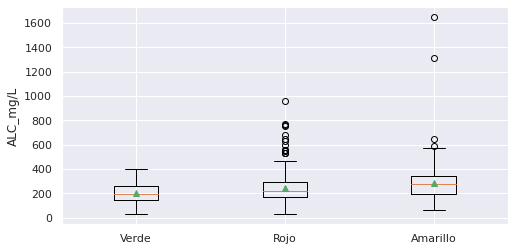

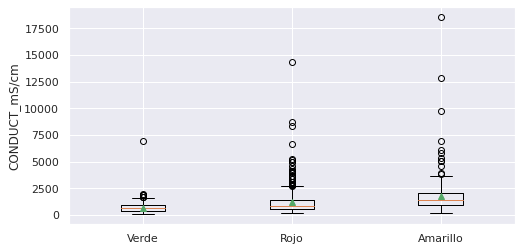

In [ ]:
#Tamaño de gráfica
sns.set(rc={'figure.figsize':(8,4)})

#Lista con colores
colores_semaforo =list(set(df_original['SEMAFORO']))

columnas = ['ALC_mg/L', 'CONDUCT_mS/cm']

for column in columnas:

  #Lista en blanco para guardar resultados
  bp=[]

  #Se inicia ciclo
  for color_semaforo in colores_semaforo:

    #Se toman los valores de interés para cada color de semáforo y se guardan en una lista
    rr = df_clean[df_clean['SEMAFORO']==color_semaforo][column]
    bp.append(rr)

  #Se transforma en numpy array para evitar probemas con la diferencia de tamaño de los arreglos
  bp = np.array(bp, dtype=object)

  #Se crea gráfico
  plt.boxplot(bp, labels=colores_semaforo, showmeans=True)
  plt.ylabel(column)

  #Se despliega gráfico
  plt.show()

**Se observa que no existe correlación entre las variables anteriores y el color del semáforo.**

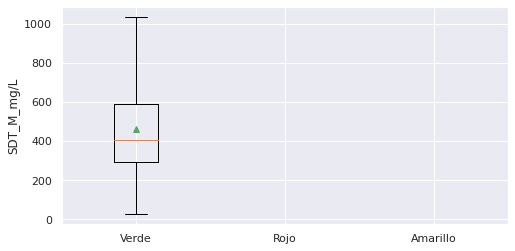

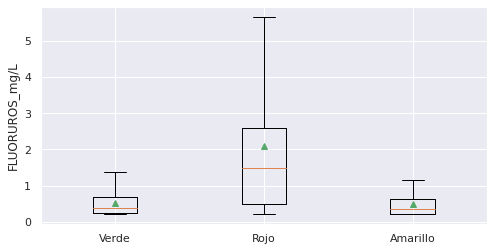

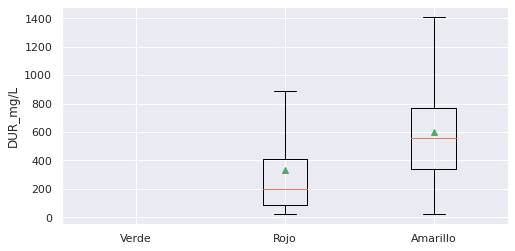

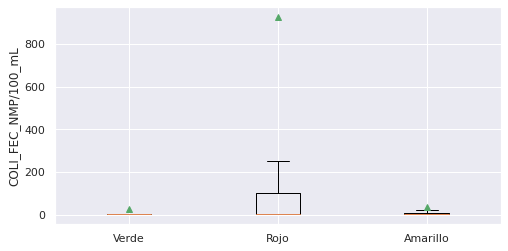

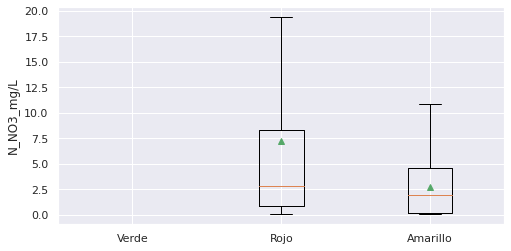

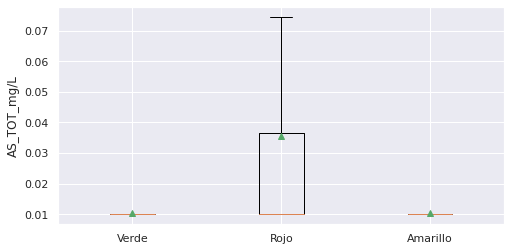

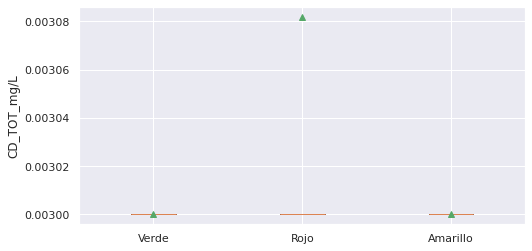

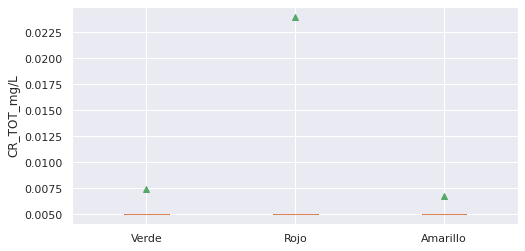

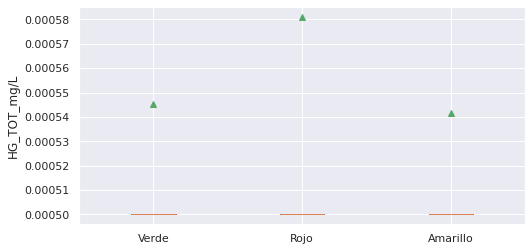

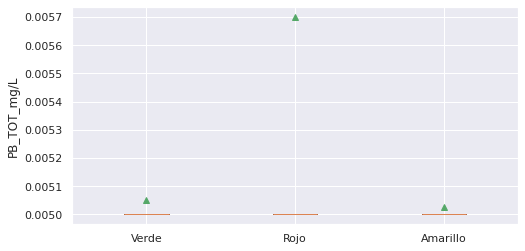

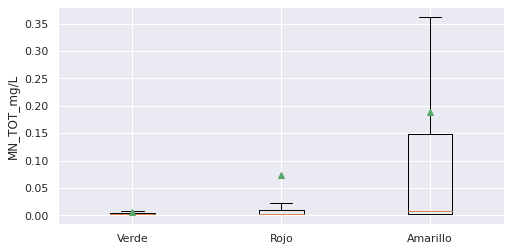

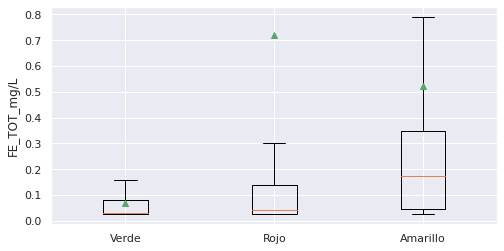

In [ ]:
#Tamaño de gráfica
sns.set(rc={'figure.figsize':(8,4)})

#Lista con colores
colores_semaforo =list(set(df_original['SEMAFORO']))

columnas = ['SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L',
        'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L',
       'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L',
       'FE_TOT_mg/L']

for column in columnas:

  #Lista en blanco para guardar resultados
  bp=[]

  #Se inicia ciclo
  for color_semaforo in colores_semaforo:

    #Se toman los valores de interés para cada color de semáforo y se guardan en una lista
    rr = df_clean[df_clean['SEMAFORO']==color_semaforo][column].str.replace("<","")
    rr = pd.to_numeric(rr).astype('float')
    bp.append(rr)

  #Se transforma en numpy array para evitar probemas con la diferencia de tamaño de los arreglos
  bp = np.array(bp, dtype=object)

  #Se crea gráfico
  plt.boxplot(bp, labels=colores_semaforo, showmeans=True, showfliers=False)
  plt.ylabel(column)

  #Se despliega gráfico
  plt.show()

**Se observa en las distribuciones que los parámetros que tienen una tendencia ascendente con respecto a la escala de colores son:**

1. **FLUORUROS_mg/L**
2. **COLI_FEC_NMP/100_mL**
3. **N_NO3_mg/L**
4. **AS_TOT_mg/L**

**A mayor concentración de los componentes anteriores, menor es la calidad del agua y por lo tanto la escala de colores asignada.**

In [ ]:
df = df_clean[['LONGITUD', 'LATITUD', 'SEMAFORO']].copy()
#df = df_original[['LONGITUD', 'LATITUD', 'SEMAFORO']].copy()

In [ ]:
df.describe(include='all')

,LONGITUD,LATITUD,SEMAFORO
count,1068.000000,1068.000000,1068
unique,NaN,NaN,3
top,NaN,NaN,Verde
freq,NaN,NaN,434
mean,-101.891007,23.163618,NaN
std,6.703263,3.887670,NaN
min,-116.664250,14.561150,NaN
25%,-105.388865,20.212055,NaN
50%,-102.174180,22.617190,NaN
75%,-98.974716,25.510285,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LONGITUD  1068 non-null   float64
 1   LATITUD   1068 non-null   float64
 2   SEMAFORO  1068 non-null   object 
dtypes: float64(2), object(1)
memory usage: 25.2+ KB


In [ ]:
df['SEMAFORO'].value_counts()

Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64

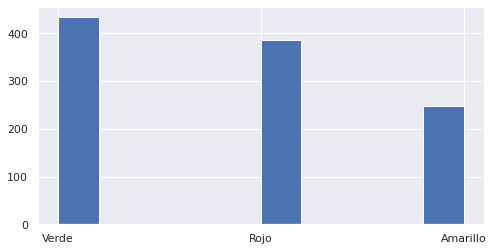

In [ ]:
plt.hist(df['SEMAFORO'], bins=10)
plt.show()

In [ ]:
df_latlog = df[['LATITUD', 'LONGITUD']].copy()

In [ ]:
semaforo = df['SEMAFORO'].copy()

**Los valores de la salida están balanceados.**

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 6.9 MB/s 
     |████████████████████████████████| 16.7 MB 5.7 MB/s 


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

In [ ]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

In [ ]:
df_latlogCoor = df_latlog.copy()

**Para la visualización de estos datos, solo es necesario los valores de 'LATITUD', 'LONGITUD' y las condiciones del agua subterranea 'SEMAFORO'. Se calcula el punto en el mapa de cada localización siguiendo el formato POINT(LOG, LAT), Asimismo, el valor del color se traduce a inglés para utilizarlo de indicador visual.**

In [ ]:
#Se crea una nueva columna con las coordenadas combinadas
df_latlogCoor["Coordinates"] = list(zip(df_latlog.LONGITUD, df_latlog.LATITUD))

#Se formatea la columna como un punto
df_latlogCoor["Coordinates"] = df_latlogCoor["Coordinates"].apply(Point)

df_latlogCoorColor =list(zip(df_latlogCoor.LONGITUD, df_latlogCoor.LATITUD, df_latlogCoor.Coordinates, df.SEMAFORO))
df_latlogCoorColor = pd.DataFrame(df_latlogCoorColor, columns=['LONGITUD', 'LATITUD', 'Coordinates', 'Color'])
df_latlogCoorColor.replace(to_replace="Verde", value="green", inplace=True)
df_latlogCoorColor.replace(to_replace="Rojo", value="red", inplace=True)
df_latlogCoorColor.replace(to_replace="Amarillo", value="yellow", inplace=True)
df_latlogCoorColor.head()

,LONGITUD,LATITUD,Coordinates,Color
0,-102.02210,22.20887,POINT (-102.0221 22.20887),green
1,-102.20075,21.99958,POINT (-102.20075 21.99958),green
2,-102.28801,22.36685,POINT (-102.28801 22.36685),red
3,-102.29449,22.18435,POINT (-102.29449 22.18435),green
4,-110.24480,23.45138,POINT (-110.2448 23.45138),red


**Antes de gráficar transformamos el Dataframe en un GeoDataFrame y de esta forma los mostramos en un mapa de México, este mapa nos ayuda a observar el estado del agua que protagoniza en cada región o aquellas áreas que es posible encontrar en las 3 calidades.**

In [ ]:
gdf_agua_sub_latlong = gpd.GeoDataFrame(df_latlogCoorColor, geometry="Coordinates")

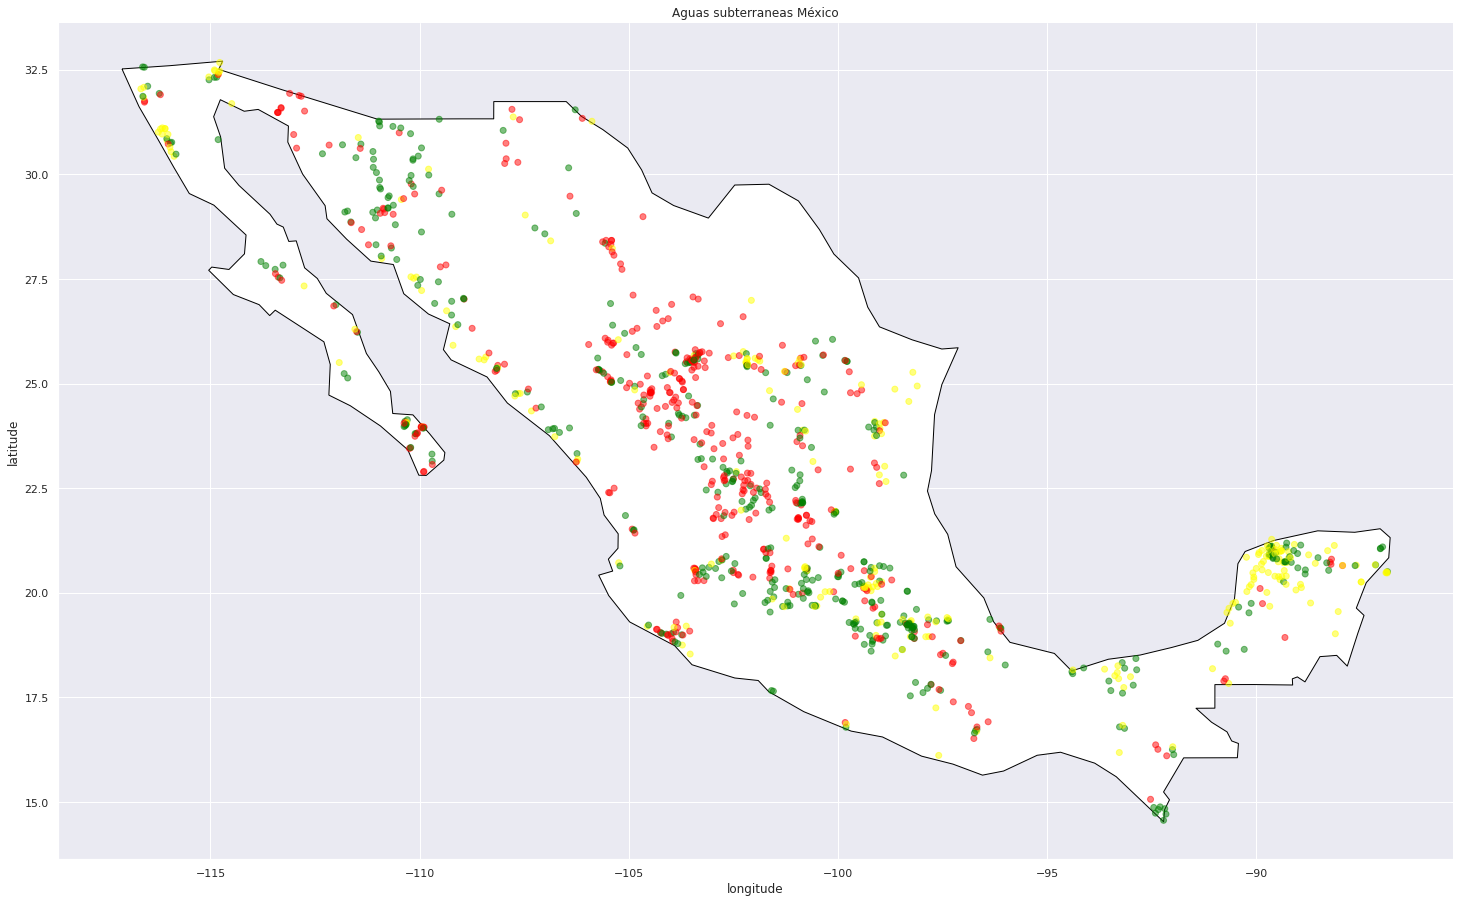

In [ ]:
fig, gax = plt.subplots(figsize=(25,25))

# Gráfica de México
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')


#Coordenadas de las ubicaciones de aguas subterraneas
gdf_agua_sub_latlong.plot(ax=gax, color=gdf_agua_sub_latlong.Color, alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Aguas subterraneas México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [ ]:
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim

In [ ]:
# Funciones para graficar los grupos de Kmean
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    X=X.to_numpy()
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

**Revisando el mapa anterior, se puede determinar que existen cierta relación en la calidad del agua y la zona geógráfica, por lo tanto se analizarán estos datos para proponer agrupamientos por regiones en base al metodo de KMeans, para ellos se proponen modelos con diferetentes clusters, con el objectivo de encontrar el mejor valor de agrupamientos.**

In [ ]:
# Creamos diferentes modelos de KMean con diferentes clusters.
kmeans_per_k = [KMeans(n_clusters=k).fit(df_latlog)
                for k in range(1, 40)]
inertias = [model.inertia_ for model in kmeans_per_k]

**En base a la gráfica de las inercias que obtenemos en los diferentes valores de clusters, determinamos que el codo se encuentra aproximadamente en 5 grupos, por lo que cualquier valor posterior podría servir para este problema.**

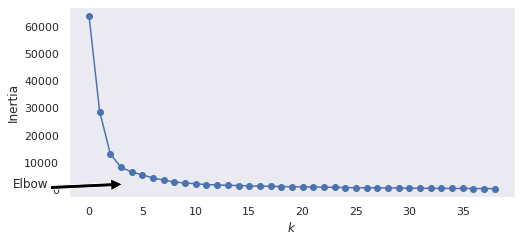

In [ ]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(0, 39, 1), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[10]), xytext=(-4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(-5.5, 650, "Elbow", horizontalalignment="center")
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


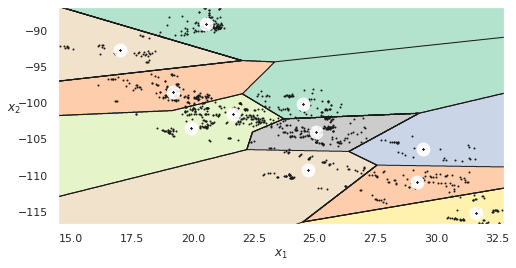

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_per_k[10], df_latlog)
plt.show()

**Otro apoyo que se utilizó para encontrar el mejor cluster, es la métrica de silhoette; en la gráfica podemos notrar que los rangos de valores estan entre 0.45 y 0.55, no obstante entre los clusters 8 y 30, tenemos un comportamiento parecido por lo que se seleccionaron 10 clusters para este problema, en base a que esta después del codo de la gráfica de inercias y tiene una buena puntuación en la métrica de Silhuette.**

In [ ]:
from sklearn.metrics import silhouette_score

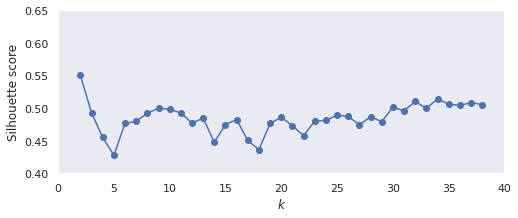

In [ ]:
silhouette_scores = [silhouette_score(df_latlog, model.labels_)
                     for model in kmeans_per_k[2:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 39), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([0, 40, 0.40, 0.65])
plt.grid()
plt.show()

**Creamos nuestro modelo óptimo y obtenemos el centro de los clusters, lo que representaría la zona centro de las aguas subterraneas de cada región agrupada.**

In [ ]:
#Se establece el modelo con el número óptimo de clusters
modelo_optimo = KMeans(n_clusters = 10)

#Se entrena al modelo
modelo_optimo.fit(df_latlog)

#Ubicación de zona centrales de aguas subterraneas
center_zone_latlong = modelo_optimo.cluster_centers_


**Con el objetivo de visualizar los zonas centro, obtenemos la representación de los centros en un DataFrame.**

In [ ]:
#Se crea un dataframe de pandas con las coordenadas de los centros
df_cen_zone_latlong = pd.DataFrame(center_zone_latlong, columns = ['latitude','longitude'])

#Se crea una nueva columna con las coordenadas combinadas
df_cen_zone_latlong["Coordinates"] = list(zip(df_cen_zone_latlong.longitude, df_cen_zone_latlong.latitude))

#Se formatea la columna como un punto
df_cen_zone_latlong["Coordinates"] = df_cen_zone_latlong["Coordinates"].apply(Point)

#Se despliega encabezado
df_cen_zone_latlong.head()

,latitude,longitude,Coordinates
0,29.427649,-106.395956,POINT (-106.39595561290322 29.427649322580645)
1,17.004097,-92.761627,POINT (-92.76162731707318 17.00409656097561)
2,23.393120,-100.969413,POINT (-100.9694130691824 23.393120194968553)
3,20.546897,-89.188374,POINT (-89.18837385123967 20.546897239669423)
4,31.614292,-115.251913,POINT (-115.25191318 31.61429212)


In [ ]:
df_cen_zone_latlong.tail()

,latitude,longitude,Coordinates
5,29.203521,-110.992920,POINT (-110.99292008139534 29.203521255813953)
6,20.348589,-102.435302,POINT (-102.43530239597315 20.348589375838927)
7,19.187807,-98.526051,POINT (-98.52605105988025 19.18780702994012)
8,24.733573,-109.261826,POINT (-109.2618255 24.73357339189189)
9,25.078067,-104.011010,POINT (-104.01100999473684 25.078066800000002)


In [ ]:
from pandas.core.internals.ops import namedtuple
from geopy.geocoders.yandex import Location
from geopy.geocoders import Nominatim
from geopy.distance import geodesic

geolocator = Nominatim(user_agent='my-application')
group_info = dict()
for i, lat, long in zip(np.arange(1, 11, 1), df_cen_zone_latlong['latitude'], df_cen_zone_latlong['longitude']):
  location = geolocator.reverse(f"{lat}, {long}")
  group_info[f'group{i}'] = location
  try:
    print(f'Agrupamiento: {i} ubicado en {location}.')
  except:
    print(f'Agrupamiento: {i} ubicado en Golfo de California.')

Agrupamiento: 1 ubicado en Los Sauces, Municipio de Chihuahua, Chihuahua, México.
Agrupamiento: 2 ubicado en El Carrizal, El Bosque, Chiapas, México.
Agrupamiento: 3 ubicado en Catorce, San Luis Potosí, México.
Agrupamiento: 4 ubicado en Tekit, Yucatán, México.
Agrupamiento: 5 ubicado en Municipio de San Felipe, Baja California, México.
Agrupamiento: 6 ubicado en Mina Pilares, Hermosillo, Sonora, 83107, México.
Agrupamiento: 7 ubicado en San Antonio de Rivas, La Barca, Jalisco, 47925, México.
Agrupamiento: 8 ubicado en Calle Emiliano Zapata, San Agustín Atzompa, Chiautzingo, Puebla, 74155, México.
Agrupamiento: 9 ubicado en Golfo de California.
Agrupamiento: 10 ubicado en Nazas, Durango, México.


In [ ]:
#Se transforma a Geografic Pandas
gdf_cen_zone_latlong = gpd.GeoDataFrame(df_cen_zone_latlong, geometry="Coordinates")

**En el siguiente mapa, podemos visualizar los centros y de esta manera es más fácil determinar que estado del agua predomina en cada uno de ellos.**

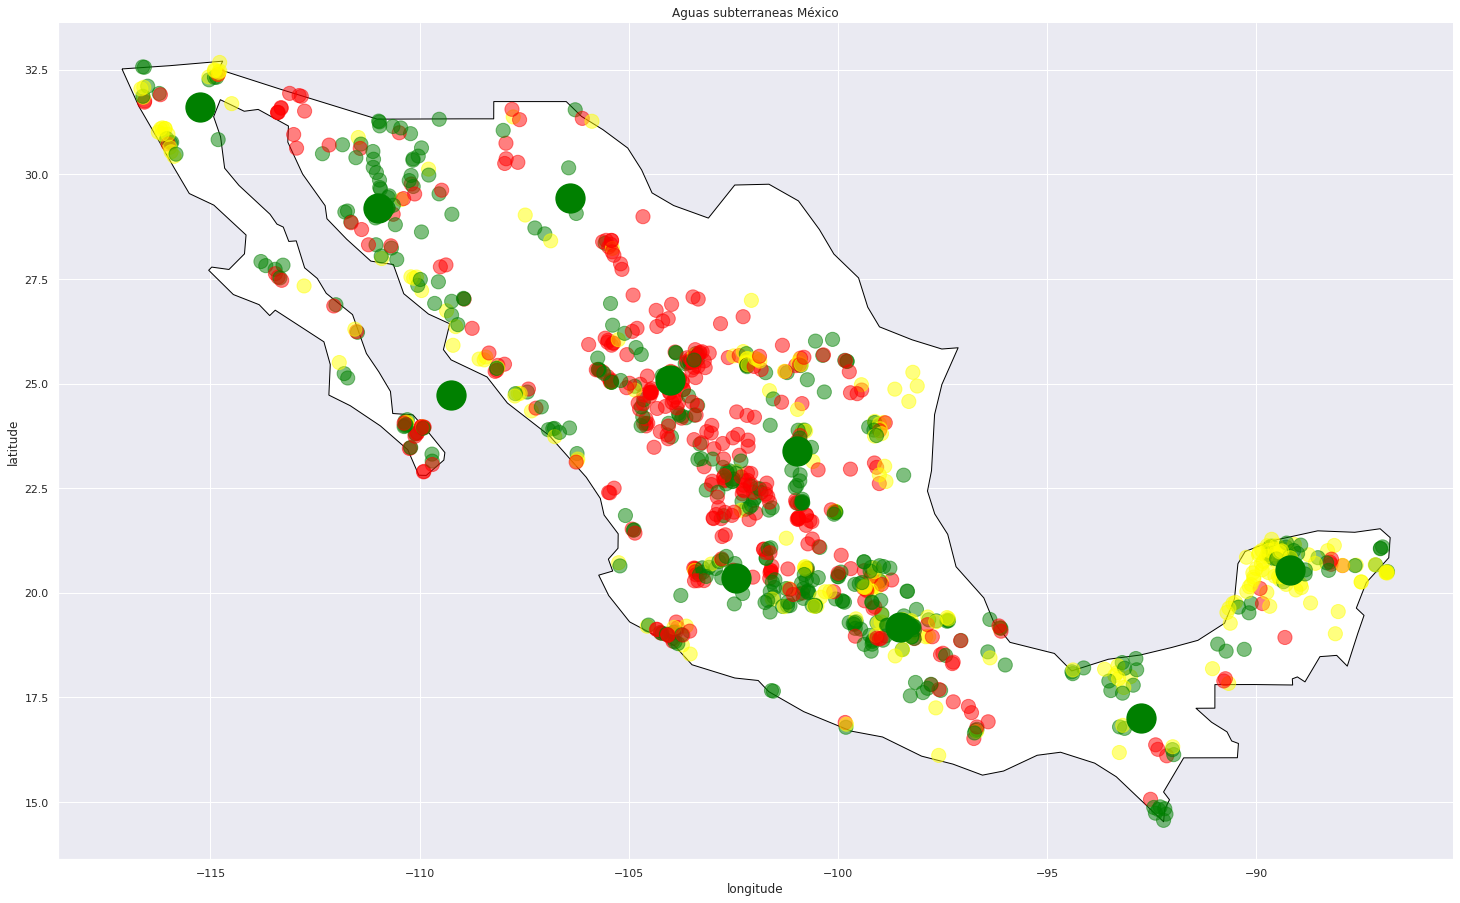

In [ ]:
fig, gax = plt.subplots(figsize=(25,25))

# Gráfica de México
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')


#Coordenadas de las ubicaciones de aguas subterraneas
gdf_agua_sub_latlong.plot(ax=gax, color=gdf_agua_sub_latlong.Color, alpha = 0.5, markersize=200)
gdf_cen_zone_latlong.plot(ax=gax, color='green', marker='o', linewidth=2, markersize=800)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Aguas subterraneas México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [ ]:
#Se crea un dataframe de pandas con las coordenadas de los centros
df_cluster_latlong = df[['LONGITUD', 'LATITUD']].copy()

#Se crea una nueva columna con las coordenadas combinadas
df_cluster_latlong["Cluster"] = modelo_optimo.predict(df_latlog)

#Se despliega encabezado
df_cluster_latlong.head()

,LONGITUD,LATITUD,Cluster
0,-102.02210,22.20887,2
1,-102.20075,21.99958,6
2,-102.28801,22.36685,2
3,-102.29449,22.18435,2
4,-110.24480,23.45138,8


In [ ]:
df_cluster_latlong['Cluster'].value_counts()

9    190
7    167
2    159
6    149
3    121
5     86
8     74
4     50
1     41
0     31
Name: Cluster, dtype: int64

**El objetivo del siguiente mapa, es mostrar la cantidad de agua subterranea que esta contemplando cada cluster, por lo que se utilizan indicadores tanto de color como de formas para poder diferencias en las zonas en las que se encuentran más cercanas las localizaciones geográficas.**

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


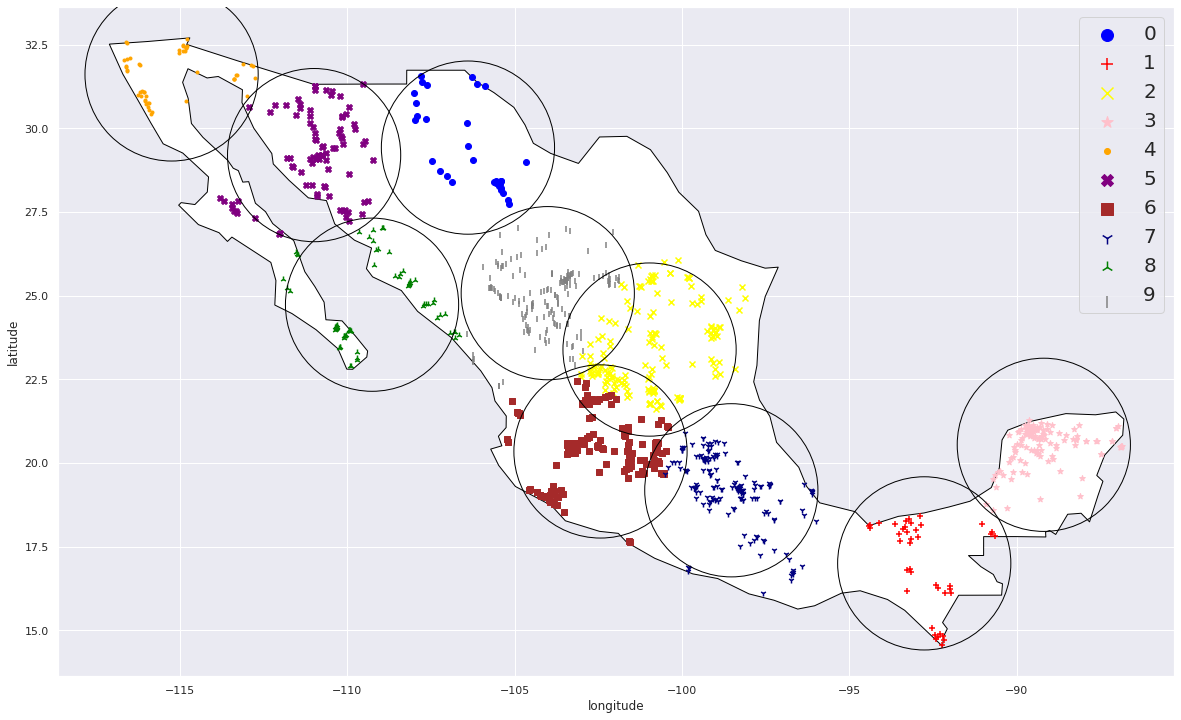

In [ ]:
centers = center_zone_latlong
geo_df = gpd.GeoDataFrame(df_cluster_latlong.drop(['LONGITUD', 'LATITUD'], axis=1),
                          crs={'init': 'epsg:4326'},
                          geometry=[Point(xy) for xy in zip(df.LONGITUD, df.LATITUD)])
      
# Set figure size
fig, ax = plt.subplots(figsize=(20,20))
#ax.set_aspect('equal')

world.query("name == 'Mexico'").plot(ax = ax, edgecolor='black', color='white')
colors = ['blue', 'red', 'yellow', 'pink', 'orange', 'purple', 'brown', 'navy', 'green', 'gray']
markers = ['o', '+', 'x', '*', '.', 'X', 's', '1', '2', 3]
clusts = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
for clust, label, color, marker in zip(clusts, labels, colors, markers):
  geo_df[geo_df['Cluster']==clust].plot(ax=ax, color=color, marker=marker, zorder=2, label=label)

centers_gseries = gpd.GeoSeries(map(Point, zip(centers[:,1], centers[:,0])))
centers_gseries.plot(ax=ax, alpha=1, marker='o', color='black', markersize=30000, zorder=3, facecolors='none')

plt.legend(markerscale=2, fontsize=20)
#plt.title('Aguas Subterraneas')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()


In [ ]:
df_cluster_status_latlong = df_cluster_latlong.copy()
df_cluster_status_latlong['SEMAFORO'] = df['SEMAFORO'].copy()
df_cluster_status_latlong.head()

,LONGITUD,LATITUD,Cluster,SEMAFORO
0,-102.02210,22.20887,2,Verde
1,-102.20075,21.99958,6,Verde
2,-102.28801,22.36685,2,Rojo
3,-102.29449,22.18435,2,Verde
4,-110.24480,23.45138,8,Rojo


In [ ]:
df_cluster_status_latlong.replace(to_replace="Verde", value="green", inplace=True)
df_cluster_status_latlong.replace(to_replace="Rojo", value="red", inplace=True)
df_cluster_status_latlong.replace(to_replace="Amarillo", value="yellow", inplace=True)

**Después de localizar cada cluster en su zona geográfica, podemos revisar la calidad de agua que protagoniza en cada cluster, de esta manera se puede determinar si existe alguna relación entre la calidad y la ubicación.**

In [ ]:
# Cluster 0: Resultados
df_cluster_status_latlong[df_cluster_status_latlong['Cluster']==0]['SEMAFORO'].value_counts()

red       19
green      7
yellow     5
Name: SEMAFORO, dtype: int64

In [ ]:
# Cluster 1: Resultados
df_cluster_status_latlong[df_cluster_status_latlong['Cluster']==1]['SEMAFORO'].value_counts()

green     22
yellow    13
red        6
Name: SEMAFORO, dtype: int64

In [ ]:
# Cluster 2: Resultados
df_cluster_status_latlong[df_cluster_status_latlong['Cluster']==2]['SEMAFORO'].value_counts()

red       73
green     59
yellow    27
Name: SEMAFORO, dtype: int64

In [ ]:
# Cluster 3: Resultados
df_cluster_status_latlong[df_cluster_status_latlong['Cluster']==3]['SEMAFORO'].value_counts()

yellow    72
green     41
red        8
Name: SEMAFORO, dtype: int64

In [ ]:
# Cluster 4: Resultados
df_cluster_status_latlong[df_cluster_status_latlong['Cluster']==4]['SEMAFORO'].value_counts()

yellow    22
red       15
green     13
Name: SEMAFORO, dtype: int64

In [ ]:
# Cluster 5: Resultados
df_cluster_status_latlong[df_cluster_status_latlong['Cluster']==5]['SEMAFORO'].value_counts()

green     54
red       23
yellow     9
Name: SEMAFORO, dtype: int64

In [ ]:
# Cluster 6: Resultados
df_cluster_status_latlong[df_cluster_status_latlong['Cluster']==6]['SEMAFORO'].value_counts()

green     68
red       62
yellow    19
Name: SEMAFORO, dtype: int64

In [ ]:
# Cluster 7: Resultados
df_cluster_status_latlong[df_cluster_status_latlong['Cluster']==7]['SEMAFORO'].value_counts()

green     87
yellow    41
red       39
Name: SEMAFORO, dtype: int64

In [ ]:
# Cluster 8: Resultados
df_cluster_status_latlong[df_cluster_status_latlong['Cluster']==8]['SEMAFORO'].value_counts()

green     31
red       25
yellow    18
Name: SEMAFORO, dtype: int64

In [ ]:
# Cluster 9: Resultados
df_cluster_status_latlong[df_cluster_status_latlong['Cluster']==9]['SEMAFORO'].value_counts()

red       117
green      52
yellow     21
Name: SEMAFORO, dtype: int64

**Con base en a los valores mostrados, se puede determinar que sería complicado tener una buena predicción de la calidad del agua en cada región dado que los valores en algunos agrupamientos estan equilibrados, por lo que no se tiene una calidad que predomine en todos los clusters. No obstante, si nos podría servir esta información para mostrar en que zonas es más preocupante la atención en la calidad, dado que ligeramente predominan los colores rojos y verdes en el semáforo.**

In [ ]:
from cycler import cycler

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


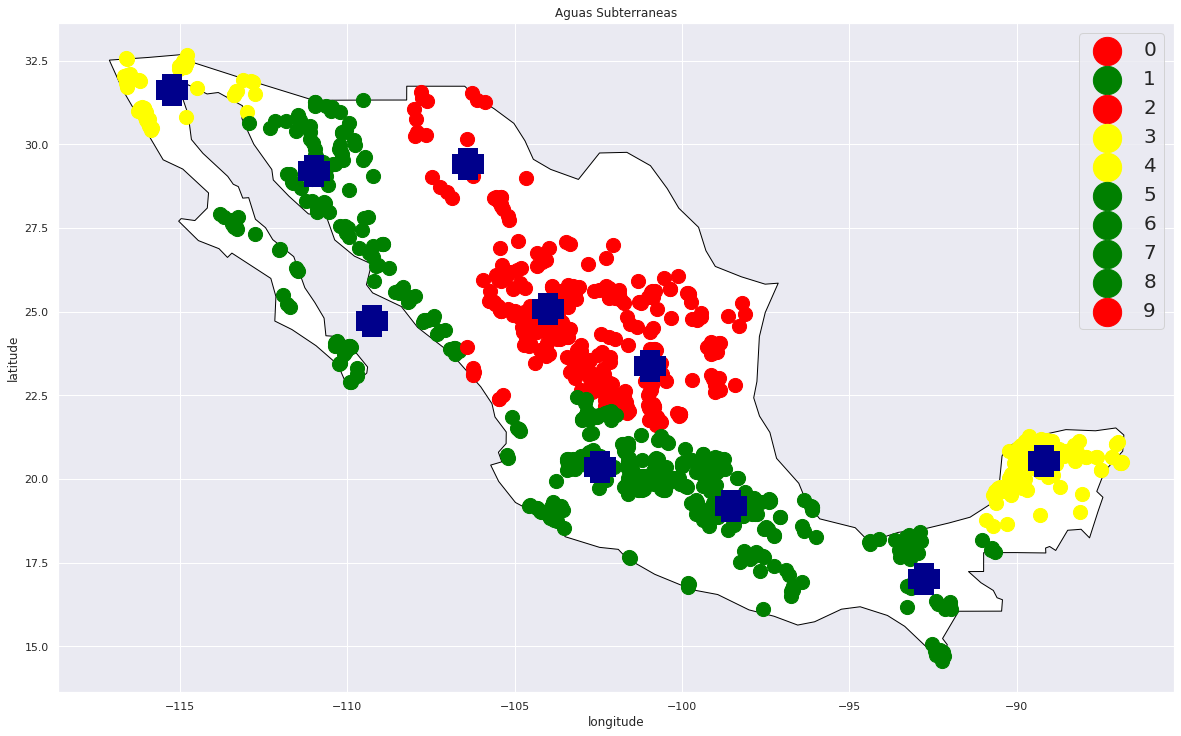

In [ ]:
centers = center_zone_latlong
geo_df = gpd.GeoDataFrame(df_cluster_status_latlong.drop(['LONGITUD', 'LATITUD'], axis=1),
                          crs={'init': 'epsg:4326'},
                          geometry=[Point(xy) for xy in zip(df_cluster_status_latlong.LONGITUD, df_cluster_status_latlong.LATITUD)])
      
# Set figure size
fig, ax = plt.subplots(figsize=(20,20))
#ax.set_aspect('equal')

world.query("name == 'Mexico'").plot(ax = ax, edgecolor='black', color='white')

clusts = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
for i, clust, label in zip(range(0, 10), clusts, labels):
  color = df_cluster_status_latlong[df_cluster_status_latlong['Cluster']==i]['SEMAFORO'].value_counts().keys()[0]
  geo_df[geo_df['Cluster']==clust].plot(ax=ax, color=color, zorder=3, markersize=200, label=label)

centers_gseries = gpd.GeoSeries(map(Point, zip(centers[:,1], centers[:,0])))
centers_gseries.plot(ax=ax, alpha=1, marker='+', color='darkblue', markersize=1000, zorder=3, linewidth=20)

plt.legend(markerscale=2, fontsize=20)
plt.title('Aguas Subterraneas')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

# **Conclusiones**

**Con base en los datos analizados, se llegó a la conclusión que a partir del método de agrupamiento era complicado encontrar agrupamientos óptimos en las zonas geográficas que nos ayudaran a determinar la calidad de agua en cada una de ellas. No obstante, se logró generar material visual para mostrar cada agrupamiento y la calidad de agua que predomina, y esto podría ayudar para tener algún indicador de las regiones que hay que enfatizar en dado caso de alguna campaña o metodología para proteger el agua subterranea. Por lo que podríamos decir que las aguas subterraneas localizadas al centro-sur del pais tienen mejor calidad que las que se encuentran en el noreste del pais. Cabe mencionar que el aumento del número de clusters podría romper ligeramente el equilibrio que existe entre calidades en cada agrupamiento, siendo así tendríamos una mejor aproximación.**

In [ ]:
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import math

In [ ]:
group_info

{'group1': Location(Los Sauces, Municipio de Chihuahua, Chihuahua, México, (29.414692, -106.3862367, 0.0)),
 'group2': Location(El Carrizal, El Bosque, Chiapas, México, (17.007184773771964, -92.75981220174053, 0.0)),
 'group3': Location(Catorce, San Luis Potosí, México, (23.6439472, -101.05506212456137, 0.0)),
 'group4': Location(Tekit, Yucatán, México, (20.56822525, -89.27540186218724, 0.0)),
 'group5': Location(Municipio de San Felipe, Baja California, México, (30.57045295, -114.88696354696394, 0.0)),
 'group6': Location(Mina Pilares, Hermosillo, Sonora, 83107, México, (29.206951261507644, -110.99544908144117, 0.0)),
 'group7': Location(San Antonio de Rivas, La Barca, Jalisco, 47925, México, (20.3481075, -102.4314085, 0.0)),
 'group8': Location(Calle Emiliano Zapata, San Agustín Atzompa, Chiautzingo, Puebla, 74155, México, (19.1906776, -98.5262087, 0.0)),
 'group9': Location(None, (0.0, 0.0, 0.0)),
 'group10': Location(Nazas, Durango, México, (25.2709734, -104.07327282269833, 0.0))}

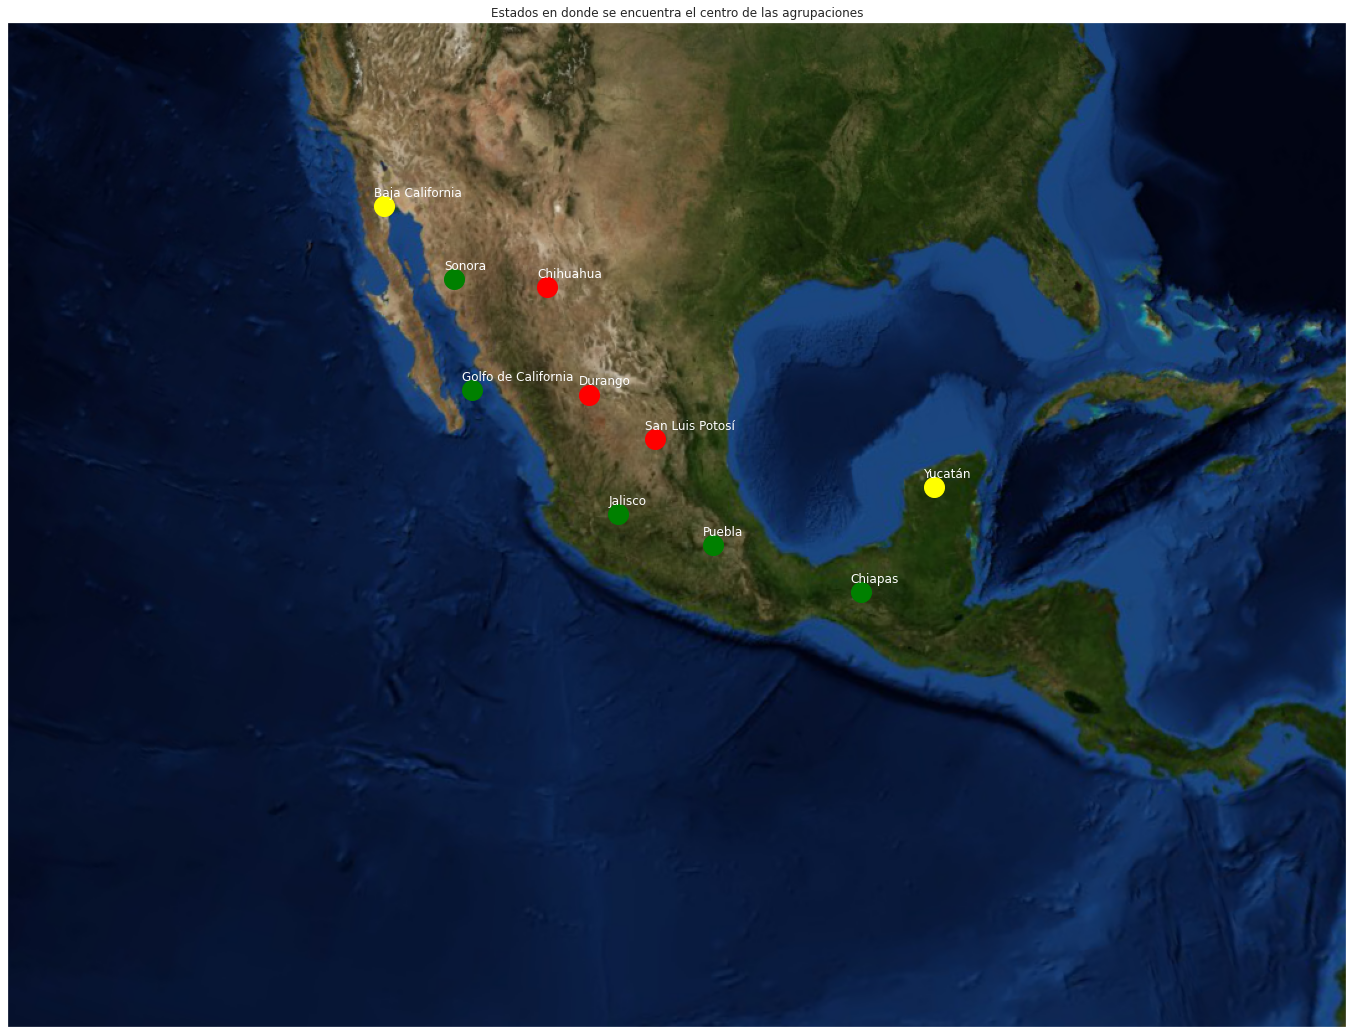

In [ ]:
map = Basemap(width=8000000,height=6000000,projection='lcc',
            resolution=None,lat_1=70.,lat_2=80,lat_0=20,lon_0=-100.)
plt.figure(num=1, figsize=(24, 20))
map.bluemarble()

geolocator = Nominatim(user_agent='my-application')

colores = ['red', 'green', 'red', 'yellow', 'yellow', 'green', 'green', 'green', 'green', 'red'] 
estados = ['Chihuahua', 'Chiapas', 'San Luis Potosí', 'Yucatán', 'Baja California', 
           'Sonora', 'Jalisco', 'Puebla', 'Golfo de California', 
           'Durango']
for color, estado, lat, long in zip(colores, estados, gdf_cen_zone_latlong['latitude'], gdf_cen_zone_latlong['longitude']):      
  x, y = map(long, lat)
  map.plot(x,y,marker='o',color=color, linewidth=1000, markersize=20)
  plt.annotate(estado, xy = (x,y), xytext=(-10,10), textcoords='offset points', color='white')
plt.title('Estados en donde se encuentra el centro de las agrupaciones')
plt.show()